In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
df_eng = pd.read_csv('gdelt_eng_suez_2021_12.csv')
df_neng = pd.read_csv('gdelt_trans_suez_2021_12.csv')

In [252]:
df_eng['Date_dt'] = pd.to_datetime(df_eng['Date'], format='%Y%m%d%H%M%S')
df_neng['Date_dt'] = pd.to_datetime(df_neng['Date'], format='%Y%m%d%H%M%S')
df_eng.shape

(2223, 27)

In [253]:
df_neng.shape

(2273, 27)

In [254]:
df = pd.concat([df_eng, df_neng])
df = df.sort_values('Date')
df = df.reset_index()
df.shape

(4496, 28)

In [255]:
df_ts = df.groupby('Date_dt').count()
df_ts = df_ts.reset_index()

In [256]:
r = pd.date_range(start=df_ts['Date_dt'].min(), end=df_ts['Date_dt'].max(), freq='15min')
df_ts = df_ts.set_index('Date_dt').reindex(r).fillna(0.0).rename_axis('Date_dt').reset_index()

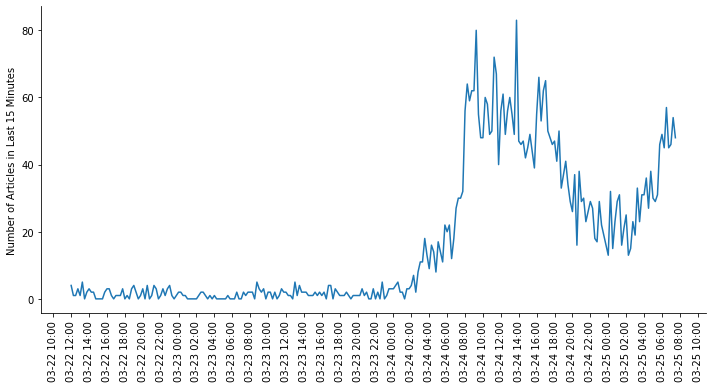

In [257]:
from matplotlib import ticker
import matplotlib.dates as mdates
ax = sns.relplot(x='Date_dt', y='SourceCommonName', kind='line', data=df_ts, aspect=2)
ax.ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
hours = mdates.HourLocator(interval=2)
ax.ax.xaxis.set_major_locator(hours)
ax.ax.set_ylabel('Number of Articles in Last 15 Minutes')
ax.ax.set_xlabel('')
plt.xticks(rotation=90)
plt.show()

In [258]:
df = df.sort_values('Date')

In [259]:
xx = df['Themes'].str.contains('DISASTER', case=False)
xx = xx.fillna(False)
yy = df['EnhancedThemes'].str.contains('TRAFFIC', case=False)
yy = yy.fillna(False)
df_disaster = df.loc[xx & yy]
df_disaster_group = df_disaster.groupby('Date_dt').count()
df_disaster_group = df_disaster_group.reset_index()
r = pd.date_range(start=df_disaster_group['Date_dt'].min(), end=df_disaster_group['Date_dt'].max(), freq='15min')
df_disaster_group = df_disaster_group.set_index('Date_dt').reindex(r).fillna(0.0).rename_axis('Date_dt').reset_index()

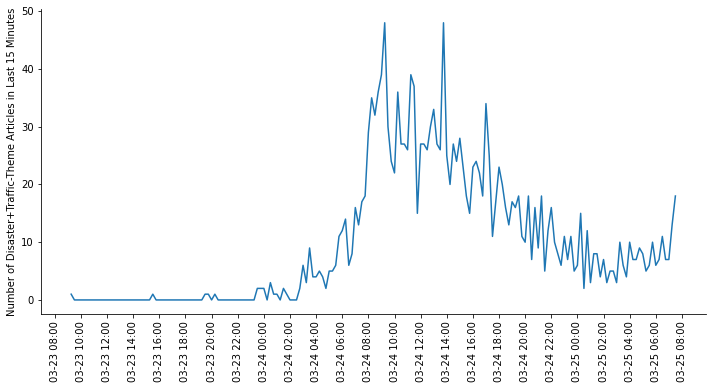

In [260]:
ax = sns.relplot(x='Date_dt', y='SourceCommonName', kind='line', data=df_disaster_group, aspect=2)
ax.ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
hours = mdates.HourLocator(interval=2)
ax.ax.xaxis.set_major_locator(hours)
ax.ax.set_ylabel('Number of Disaster+Traffic-Theme Articles in Last 15 Minutes')
ax.ax.set_xlabel('')
plt.xticks(rotation=90)
plt.show()

In [204]:
df_disaster_group.iloc[36]

Date_dt                  2021-03-23 16:15:00
index                                      1
Unnamed: 0                                 1
Date                                       1
SourceCollectionID                         1
SourceCommonName                           1
DocumentIdentifier                         1
Counts_v1                                  0
Counts_v2                                  0
Themes                                     1
EnhancedThemes                             1
Locations                                  1
EnhancedLocations                          1
Persons                                    0
EnhancedPersons                            0
Organizations                              1
EnhancedOrganizations                      1
5Tone                                      1
EnhancedDates                              1
GCAM                                       1
SharingImage                               1
RelatedImages                              0
SocialImag

In [261]:
df_disaster.loc[df_disaster['Date']>20210323150000]

,index,Unnamed: 0,Date,SourceCollectionID,SourceCommonName,DocumentIdentifier,Counts_v1,Counts_v2,Themes,EnhancedThemes,...,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslateInfo,Date_dt
155,30,20210323153000-1251,20210323153000,1,maritimebulletin.net,http://www.maritimebulletin.net/2021/03/23/meg...,NaN,NaN,MARITIME;MARITIME_INCIDENT_SELF_IDENTIFIED;MAN...,"TRAFFIC,259;TAX_FNCACT_MANAGER,468;MARITIME,47...",...,"wc:77,c12.1:2,c12.10:4,c12.12:1,c12.13:3,c12.1...",http://www.maritimebulletin.net/wp-content/upl...,NaN,NaN,NaN,NaN,"Post Views,11;Suez Canal,49;Yantian China,331",NaN,NaN,2021-03-23 15:30:00
180,34,20210323193000-75,20210323193000,1,theportugalnews.com,https://www.theportugalnews.com/news/2021-03-2...,NaN,NaN,UNGP_FORESTS_RIVERS_OCEANS;MARITIME_INCIDENT;M...,"ARMEDCONFLICT,4245;EPU_CATS_NATIONAL_SECURITY,...",...,"wc:826,c1.2:5,c1.3:10,c12.1:54,c12.10:93,c12.1...",https://www.theportugalnews.com/uploads/news/a...,NaN,NaN,NaN,735|50||at this moment nobody can tell how fas...,"Lusa News,535;Hydrographical Institute,689;Uni...","2,new large areas,571;8,countries with seats o...",NaN,2021-03-23 19:30:00
181,146,20210323194500-T2230,20210323194500,1,akhbarelyom.com,https://akhbarelyom.com/news/newdetails/330509...,NaN,NaN,CRISISLEX_O01_WEATHER;MANMADE_DISASTER_IMPLIED...,"AGRICULTURE,3768;TRAFFIC,3659;EPU_CATS_MIGRATI...",...,"wc:615,nwc:672,c12.1:57,c12.10:92,c12.12:59,c1...",https://Images.akhbarelyom.com/images/images/l...,NaN,NaN,https://youtube.com/user/akhbarelyoumtv;,NaN,"Salah Hassan,206;Face Maritime,602;Greater Cai...","2,ports ship of ships,2475;",srclc:ara;eng:GT-ARA 1.0,2021-03-23 19:45:00
183,36,20210323201500-1044,20210323201500,1,cityam.com,https://www.cityam.com/suez-canal-blocked-with...,NaN,NaN,TRAFFIC;ENV_WATERWAYS;WB_1805_WATERWAYS;WB_135...,"GENERAL_GOVERNMENT,1155;EPU_POLICY_GOVERNMENT,...",...,"wc:206,c1.2:1,c12.1:5,c12.10:9,c12.12:3,c12.13...",https://www.cityam.com/wp-content/uploads/2021...,NaN,NaN,NaN,NaN,"Suez Canal,15;Ever Given,251;Suez Canal,597;Ev...","59000000,Ever Given cargo ship,198;",NaN,2021-03-23 20:15:00
202,41,20210323233000-972,20210323233000,1,sputniknews.com,https://sputniknews.com/africa/202103231082432...,NaN,NaN,MANMADE_DISASTER_IMPLIED;MARITIME_INCIDENT;MAR...,"GENERAL_GOVERNMENT,2682;EPU_POLICY_GOVERNMENT,...",...,"wc:484,c1.2:2,c12.1:21,c12.10:30,c12.12:20,c12...",https://cdn1.img.sputniknews.com/images/07e5/0...,NaN,https://instagram.com/p/CMxEKHanW62;https://pi...,https://youtube.com/embed/AhSzxe0FuIE;https://...,NaN,"Suez Canal,174;Ever Given,626;Tanjung Pelepas,...","079,tons flying the flag,567;12,tugs trying,11...",NaN,2021-03-23 23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,2258,20210325073000-T460,20210325073000,1,vesti.ru,https://www.vesti.ru/article/2541396,NaN,NaN,MARITIME_INCIDENT;MARITIME;MANMADE_DISASTER_IM...,"AFFECT,464;TRAFFIC,434;MOVEMENT_GENERAL,145;MA...",...,"wc:82,nwc:102,c12.1:6,c12.10:4,c12.13:3,c12.14...",https://cdn-st1.rtr-vesti.ru/vh/pictures/xw/31...,NaN,NaN,https://youtube.com/Russia24TV;,NaN,"New Channel,211;Via Suez Channel,314;Lock Suez...","2,w three days,221;",srclc:rus;eng:GT-RUS 1.0,2021-03-25 07:30:00
4462,2256,20210325073000-T207,20210325073000,1,lessentiel.lu,http://www.lessentiel.lu/de/panorama/story/214...,NaN,NaN,ENV_OIL;ECON_OILPRICE;TAX_ECON_PRICE;UNGP_FORE...,"TRAFFIC,664;TRAFFIC,2596;TAX_ECON_PRICE,63;TAX...",...,"wc:514,nwc:647,c1.2:2,c1.3:1,c12.1:26,c12.10:6...","http://www.lessentiel.lu/dyim/18841d/T786,384/...",NaN,NaN,NaN,NaN,"Suez Canal,12;Crude Oil,25;Kilometers North,19...","6,Kilometers North of Suez,144;2,Pastures,213;...",srclc:deu;eng:GT-DEU 1.0,2021-03-25 07:30:00
4463,2254,20210325073000-T93,20210325073000,1,laprovence.com,https://www.laprovence.com/actu/en-direct/6303...,NaN,NaN,MANMADE_DISASTER_IMPLIED;MARITIME_INCIDENT;MAR...,"TRAFFIC,380;MARITIME_INCIDENT,47;MARITIME,47;E...",...,"wc:153,nwc:179,c1

In [293]:
df_disaster.loc[1558]['DocumentIdentifier']

'https://www.nakedcapitalism.com/2021/03/links-3-24-2021.html'

In [263]:
df_disaster.loc[155]

index                                                                   30
Unnamed: 0                                             20210323153000-1251
Date                                                        20210323153000
SourceCollectionID                                                       1
SourceCommonName                                      maritimebulletin.net
DocumentIdentifier       http://www.maritimebulletin.net/2021/03/23/meg...
Counts_v1                                                              NaN
Counts_v2                                                              NaN
Themes                   MARITIME;MARITIME_INCIDENT_SELF_IDENTIFIED;MAN...
EnhancedThemes           TRAFFIC,259;TAX_FNCACT_MANAGER,468;MARITIME,47...
Locations                                          1#Panama#PM#PM#9#-80#PM
EnhancedLocations                             1#Panama#PM#PM##9#-80#PM#458
Persons                                                                NaN
EnhancedPersons          

In [285]:
df_wc = df_disaster['GCAM'].str.split(',').str[0]
df_wc = df_wc.apply(lambda x: int(x[3:]))
df_wc.sort_values().iloc[-20:-10]

1877    1707
1965    1709
1558    1767
3680    1842
1428    1892
1466    1892
1421    1892
1052    1917
2332    1969
4236    1981
Name: GCAM, dtype: int64

In [292]:
df_disaster.loc[1558]

index                                                                  694
Unnamed: 0                                              20210324120000-316
Date                                                        20210324120000
SourceCollectionID                                                       1
SourceCommonName                                       nakedcapitalism.com
DocumentIdentifier       https://www.nakedcapitalism.com/2021/03/links-...
Counts_v1                                                              NaN
Counts_v2                                                              NaN
Themes                   TAX_WORLDBIRDS;TAX_WORLDBIRDS_PEREGRINE_FALCON...
EnhancedThemes           RURAL,6492;TAX_DISEASE_INFECTION,3629;MARITIME...
Locations                2#New York, United States#US#USNY#42.1497#-74....
EnhancedLocations        4#Toronto, Ontario, Canada#CA#CA08#12686#43.66...
Persons                  jerome powell;matt taibbi;soto venezuelanalysi...
EnhancedPersons          